In [17]:
import importlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv("bpi2017_processed.csv")
df.head()

,case:concept:name,NumberOfOffers,Action,org:resource,concept:name,EventOrigin,EventID,lifecycle:transition,time:timestamp,case:LoanGoal,...,OfferedAmount,OfferID,treatedCase,caseSuccesful,treatmentSuccess,offerNumber,offerSuccess,treatmentOffer,timeApplication,weekdayApplication
0,Application_1000086665,1,Created,User_1,A_Create Application,Application,Application_1000086665,complete,2016-08-03 15:57:21.673000+00:00,"Other, see explanation",...,5000.0,Offer_410892064,0,0,0,1.0,False,0,0.000,2.0
1,Application_1000086665,1,statechange,User_1,A_Submitted,Application,ApplState_161925113,complete,2016-08-03 15:57:21.734000+00:00,"Other, see explanation",...,5000.0,Offer_410892064,0,0,0,1.0,False,0,0.061,2.0
2,Application_1000086665,1,Created,User_1,W_Handle leads,Workflow,Workitem_747707399,schedule,2016-08-03 15:57:21.963000+00:00,"Other, see explanation",...,5000.0,Offer_410892064,0,0,0,1.0,False,0,0.290,2.0
3,Application_1000086665,1,Deleted,User_1,W_Handle leads,Workflow,Workitem_1030261128,withdraw,2016-08-03 15:58:28.286000+00:00,"Other, see explanation",...,5000.0,Offer_410892064,0,0,0,1.0,False,0,66.613,2.0
4,Application_1000086665,1,Created,User_1,W_Complete application,Workflow,Workitem_1127124826,schedule,2016-08-03 15:58:28.293000+00:00,"Other, see explanation",...,5000.0,Offer_410892064,0,0,0,1.0,False,0,66.620,2.0


In [6]:
column_names = df.columns
column_names

Index(['case:concept:name', 'NumberOfOffers', 'Action', 'org:resource',
       'concept:name', 'EventOrigin', 'EventID', 'lifecycle:transition',
       'time:timestamp', 'case:LoanGoal', 'case:ApplicationType',
       'case:RequestedAmount', 'FirstWithdrawalAmount', 'NumberOfTerms',
       'Accepted', 'MonthlyCost', 'Selected', 'CreditScore', 'OfferedAmount',
       'OfferID', 'treatedCase', 'caseSuccesful', 'treatmentSuccess',
       'offerNumber', 'offerSuccess', 'treatmentOffer', 'timeApplication',
       'weekdayApplication'],
      dtype='object')

In [18]:
non_numeric_columns = list(df.select_dtypes(exclude=[np.number]).columns)

for col in non_numeric_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

df_float = df.astype('float32')
df_float.head(5)

,case:concept:name,NumberOfOffers,Action,org:resource,concept:name,EventOrigin,EventID,lifecycle:transition,time:timestamp,case:LoanGoal,...,OfferedAmount,OfferID,treatedCase,caseSuccesful,treatmentSuccess,offerNumber,offerSuccess,treatmentOffer,timeApplication,weekdayApplication
0,0.0,1.0,0.0,0.0,4.0,0.0,207531.0,1.0,651433.0,10.0,...,5000.0,29898.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,2.0
1,0.0,1.0,4.0,0.0,8.0,0.0,66579.0,1.0,651434.0,10.0,...,5000.0,29898.0,0.0,0.0,0.0,1.0,0.0,0.0,0.061000,2.0
2,0.0,1.0,0.0,0.0,22.0,2.0,1099135.0,3.0,651435.0,10.0,...,5000.0,29898.0,0.0,0.0,0.0,1.0,0.0,0.0,0.290000,2.0
3,0.0,1.0,1.0,0.0,22.0,2.0,444808.0,6.0,651437.0,10.0,...,5000.0,29898.0,0.0,0.0,0.0,1.0,0.0,0.0,66.612999,2.0
4,0.0,1.0,0.0,0.0,21.0,2.0,482929.0,3.0,651438.0,10.0,...,5000.0,29898.0,0.0,0.0,0.0,1.0,0.0,0.0,66.620003,2.0


In [19]:
all_offers = df_float.drop_duplicates(subset='OfferID', keep='first')
all_offer_columns = all_offers.drop(columns=['EventID', 'OfferID', 'case:concept:name'])

In [20]:
treated_offers = all_offer_columns[all_offer_columns['treatmentOffer'] == 1]
#treated_offer_columns = treated_offers[['NumberOfOffers', 'NumberOfTerms', 'MonthlyCost', 'CreditScore', 'OfferedAmount', 'case:RequestedAmount', 'FirstWithdrawalAmount', 'successful', 'treatmentSuccess']]

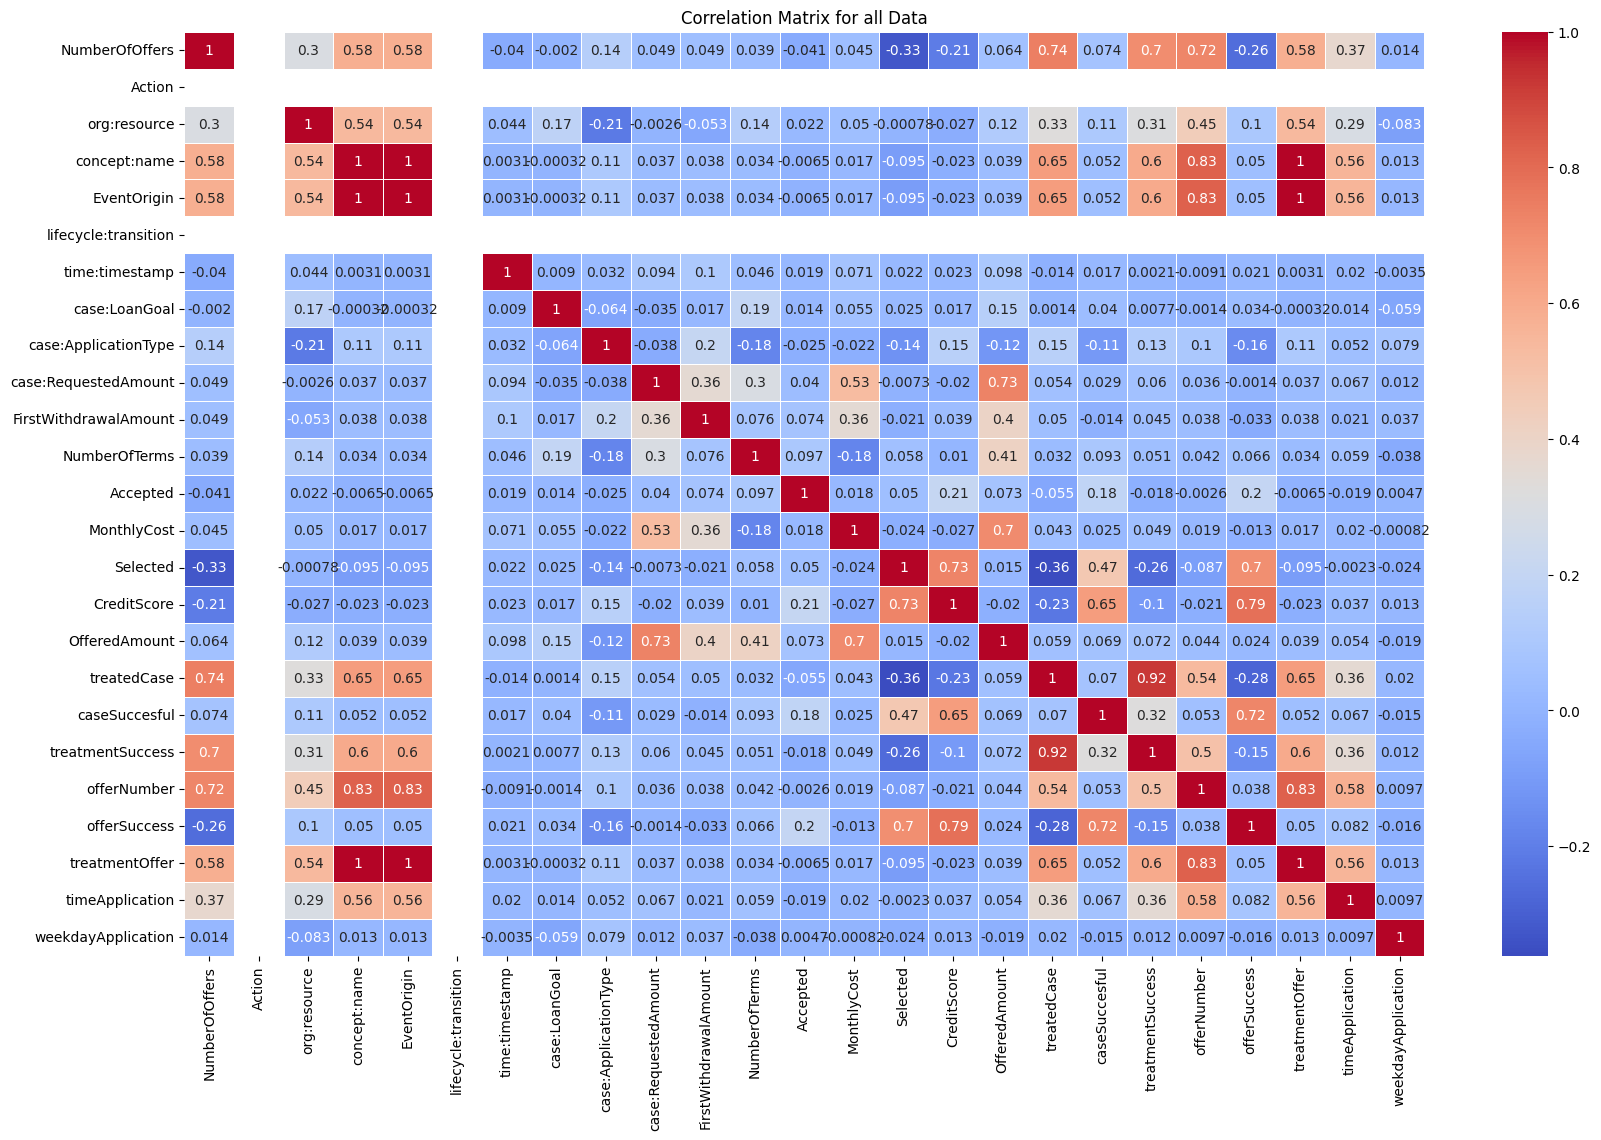

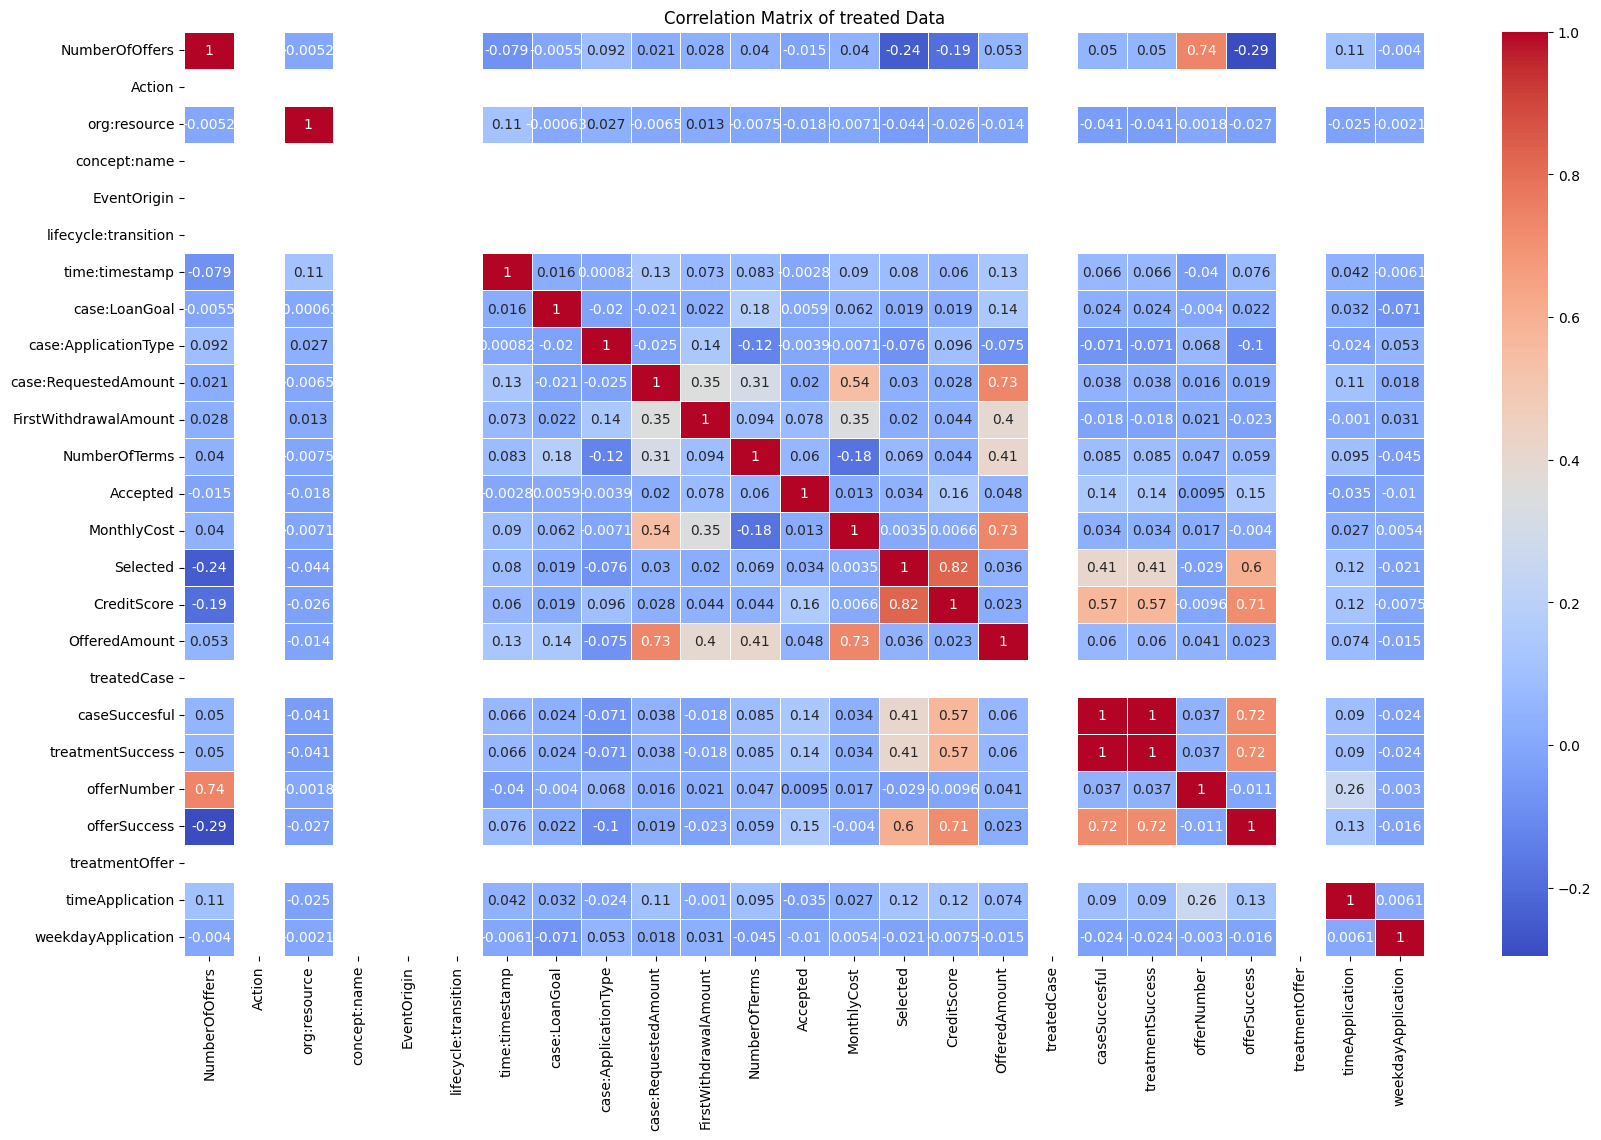

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix_all = all_offer_columns.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix_all, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix for all Data")
plt.show()

correlation_matrix_treated = treated_offers.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix_treated, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix of treated Data")
plt.show()

In [5]:
total_cases = df['case:concept:name'].nunique()

df_unique_offers = df.drop_duplicates(subset=['case:concept:name'])

# Calculate the distribution of NumberOffers in percent
offer_distribution_percent = df_unique_offers['NumberOfOffers'].value_counts(normalize=True) * 100

# Calculate the distribution of NumberOffers in number
offer_distribution_count = df_unique_offers['NumberOfOffers'].value_counts()

# Print the results
print(f'Total number of cases: {total_cases}')
print('NumberOffers distribution in percent:')
print(offer_distribution_percent)
print('NumberOffers distribution in number:')
print(offer_distribution_count)

Total number of cases: 31411
NumberOffers distribution in percent:
NumberOfOffers
1     72.904397
2     20.849384
3      4.256471
4      1.394416
5      0.397950
6      0.092324
7      0.050938
8      0.038203
9      0.009551
10     0.006367
Name: proportion, dtype: float64
NumberOffers distribution in number:
NumberOfOffers
1     22900
2      6549
3      1337
4       438
5       125
6        29
7        16
8        12
9         3
10        2
Name: count, dtype: int64
